In [1]:
import jax
import os
import jax.numpy as jnp
import numpy as np
from jax import random
import time
import pickle
import matplotlib.pyplot as plt

In [2]:
if os.path.isdir('datasets/8mfsk'):
    pass
else:
    os.system('mkdir datasets/8mfsk')

### Dataset generation
Sampling rate 1 kHz


8 equally distant MFSK symbols, one noise signal spacing of 100 Hz

Symbol duration 3

Power has gone through ideal AGC so strength of received signal is equal to one.

Noise will be at Carrier Noise Density ratio 15 dB

Number of waveforms per frequnecy = 1000

1 % frequnency offset



In [2]:
sampling_rate = 1600
frequnecies = jnp.arange(1, 9, 1)*100
duration = 3
samples = int(int(sampling_rate) * duration)
CNO_list =  [14.2]
freq_offset_percent_list = [0.05]
doppler_rate_uncertainty = [50/3]


num_waveforms = 1000

t = jnp.linspace(0, duration, samples)

waveforms = []

key = random.PRNGKey(time.time_ns())


for CNO in CNO_list:
    waveforms_first_layer = []
    for freq_offset_percent in freq_offset_percent_list:
        waveforms_second_layer = []
        for idx, freq in enumerate(frequnecies):
            for i in range(num_waveforms):
                key, subkey = random.split(key)
                
                phase = random.uniform(key, shape=(1,), minval=0, maxval=2*jnp.pi)
                
                freq_off = freq + jax.random.uniform(key, 1, minval=-freq*freq_offset_percent/2,maxval=freq*freq_offset_percent/2)

                # Add Doppler rate uncertainty as a time-dependent offset
                dru_effect = random.uniform(
                    subkey, shape=(1,), minval=-doppler_rate_uncertainty[0], maxval= doppler_rate_uncertainty[0]
                ) * t  # Linear Doppler drift

                freq_off += dru_effect

                wave = jnp.sqrt(2)*jnp.sin(2*jnp.pi*freq_off*t + phase) + jax.random.normal(subkey, shape=(samples))*jnp.sqrt(sampling_rate/2*1/10**(CNO/10))

                waveforms.append((wave/jnp.sqrt(jnp.mean(wave**2)), idx))
                # waveforms_second_layer.append((wave/jnp.sqrt(jnp.mean(wave**2)), idx)) ## Use in acuracy measurement

        for i in range(num_waveforms):
            key, subkey = random.split(key)
            wave = jax.random.normal(key, (samples))
            waveforms_second_layer.append((wave/jnp.sqrt(jnp.mean(wave**2)), 8))
            waveforms.append((wave/jnp.sqrt(jnp.mean(wave**2)), 8))
        #waveforms_first_layer.append(waveforms_second_layer) # Use in accuracy measurements
    
    #waveforms.append(waveforms_first_layer)
# Save waveforms
with open(f'datasets/8mfsk/accu_test_waveforms_CNO_{CNO_list},{doppler_rate_uncertainty}_and{freq_offset_percent_list}_samprate_{sampling_rate}.pkl', 'wb') as f:
    pickle.dump(waveforms, f)

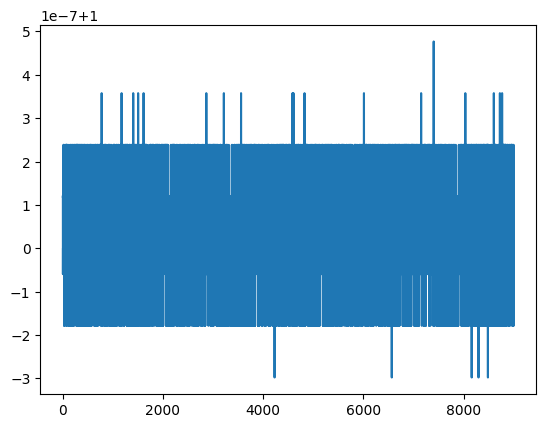

In [13]:
# Calculate mean power of all waveforms
#print(type(waveforms[1001][0]))
#print(jnp.mean(waveforms[0][0]**2))
mean_power = [jnp.mean(x[0]**2) for x in waveforms]
plt.plot(mean_power)

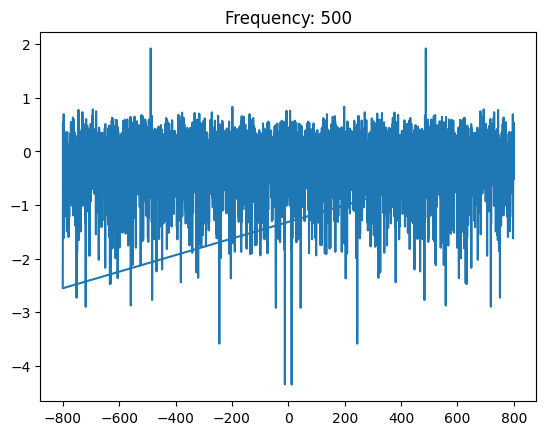

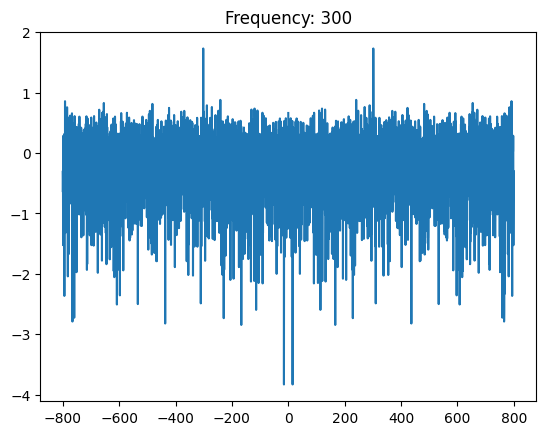

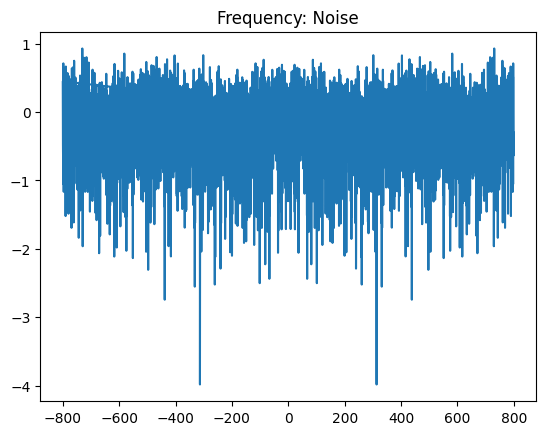

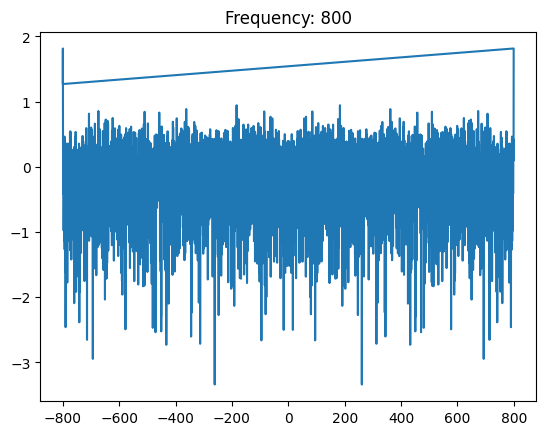

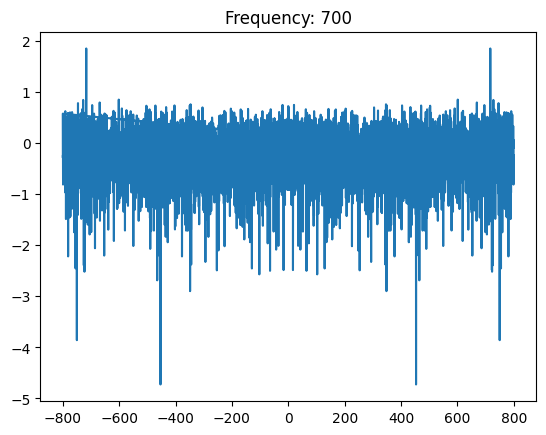

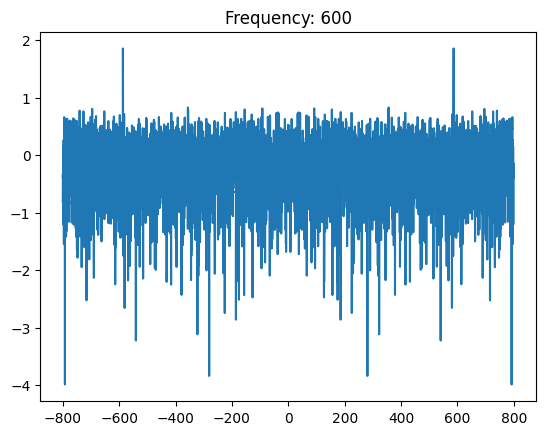

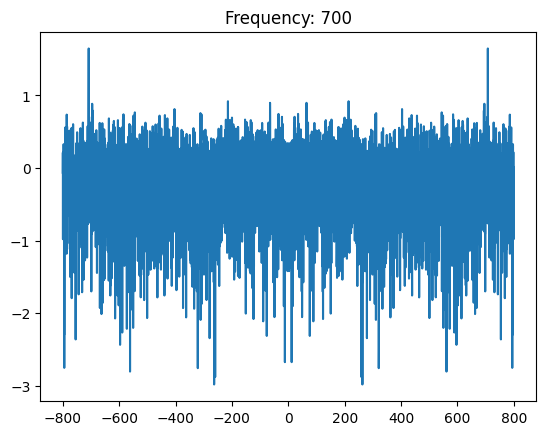

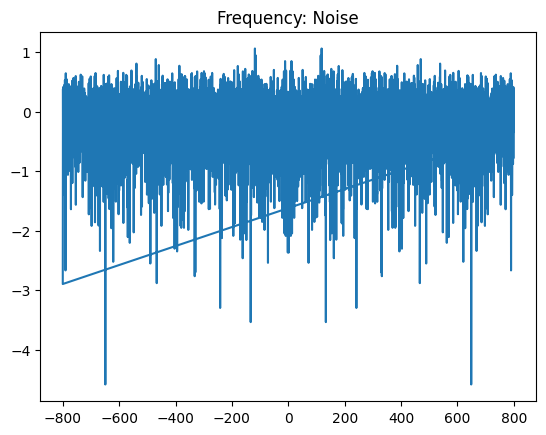

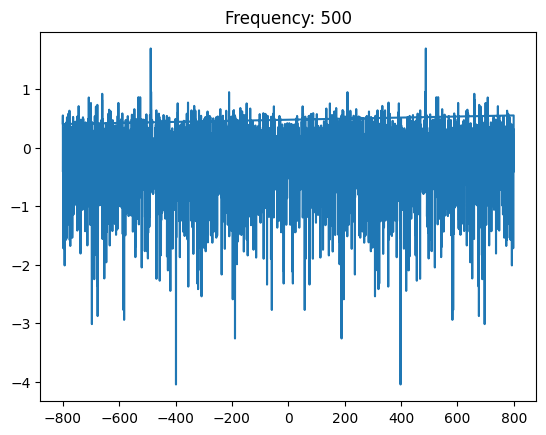

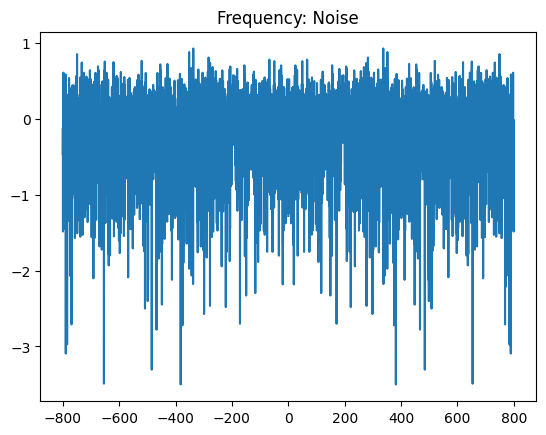

In [14]:
# Verify 100 random waveforms from the dataset by doing fft plot

for i in range(10):
    k = np.random.choice(len(waveforms))
    plt.figure()
    plt.plot(np.fft.fftfreq(len(waveforms[0][0]), 1/sampling_rate),jnp.log10(jnp.abs(jnp.fft.fft(waveforms[k][0]))**2/len(waveforms[0][0])))
    plt.title(f'Frequency: {frequnecies[waveforms[k][1]] if waveforms[k][1]!= 8 else "Noise"}')
    plt.show()
    plt.close()

In [36]:
len(waveforms[0][0])

3000

In [ ]:
from scipy.signal import welch

phase = random.uniform(key, shape=(1,), minval=0, maxval=2*jnp.pi)
waveform = jnp.sqrt(2)*jnp.sin(2*jnp.pi*(frequnecies[7]+random.uniform(subkey, 1, minval=-frequency_offset[7]/2,maxval=frequency_offset[7]/2))*t + phase)
noise = waveform 
subkey, _ = random.split(subkey)

freq, psd = welch(noise, fs=sampling_rate, scaling='spectrum')
N0_psd = jnp.mean(psd)
N0_psd, 10*np.log10(1/N0_psd*2)

NameError: name 'frequency_offset' is not defined

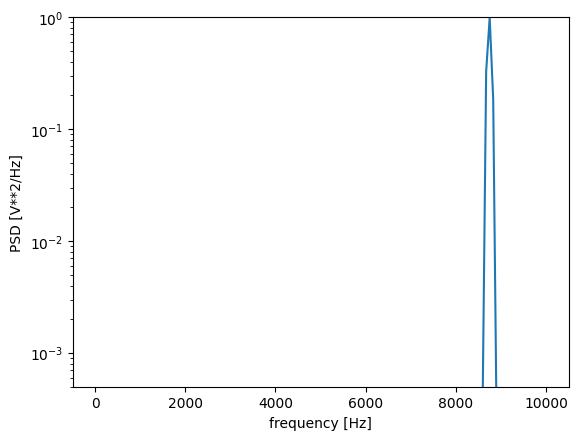

In [ ]:
plt.semilogy(freq, psd)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()